In [13]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [14]:
import platform;

print(platform.sys.version);

3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]


In [15]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## testeando la lectura de imagenes

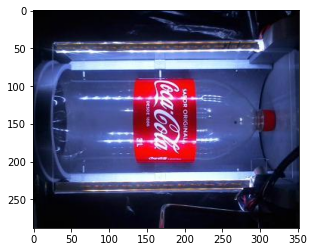

(288, 352, 3)
(1, 288, 352, 3)


In [16]:
img = cv2.imread(r"RUTAREPOSITORIOSDATASETS")
img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

img = img_cvt
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

## CONVERTIR IMAGENES A UN ARRAY DE DATOS BASADOS EN LOS COLORES RGB (GRUPO 1 COCACOLA)

In [17]:
path_cocacola = r"PATH COCACOLA"
cocacola = []
img_size=150

for img in os.listdir(path_cocacola):    
    img = cv2.imread(os.path.join(path_cocacola,img))
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    img_resize = cv2.resize(img,(img_size,img_size))
    
    cocacola.append(img_resize)

print(len(cocacola))
cocacola=np.array(cocacola)
print(cocacola.shape)


100
(100, 150, 150, 3)


## CONVERTIR IMAGENES A UN ARRAY DE DATOS BASADOS EN LOS COLORES RGB (GRUPO 2 BAVARIA)

In [18]:
path_bavaria = r"PATH BABARIA"
bavaria = []
img_size=150

for img in os.listdir(path_bavaria):    
    img = cv2.imread(os.path.join(path_bavaria,img))
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    img_resize = cv2.resize(img,(img_size,img_size))
    bavaria.append(img_resize)

bavaria=np.array(bavaria)
print(bavaria.shape)

(100, 150, 150, 3)


## UNIENDO LOS DOS DATASETS Y COLOCANDOLE ETIQUETAS

In [27]:
images = np.concatenate([cocacola,bavaria])
print(len(images))
Images = np.array(images)
print(Images.shape)

etiquetas_cocacola = np.repeat(0,100)
etiquetas_bavaria = np.repeat(1,100)

print(etiquetas_bavaria)
class_names=['cocacola','bavaria']
labels = np.concatenate([etiquetas_cocacola,etiquetas_bavaria])
Labels = np.array(labels)
print('labels')
print(Labels)

200
(200, 150, 150, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=30)
trained=model.fit(Images, Labels, epochs=30)

Epoch 1/30
7/7 [==============================] - 3s 38ms/step - loss: 4791.7047 - accuracy: 0.5954
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 598.9708 - accuracy: 0.5001
Epoch 3/30
7/7 [==============================] - 0s 31ms/step - loss: 190.1373 - accuracy: 0.6377
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.1334 - accuracy: 0.9912
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/30
7/7 [==============================] - 0s 36ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/30
7/7 [==============================] - 0s 37ms/step - loss: 0.0000e+00 - accuracy: 1.000

In [23]:
img = Images[14]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [24]:
predictions_single = model.predict(img)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

[[1. 0.]]
1.0
0
cocacola
